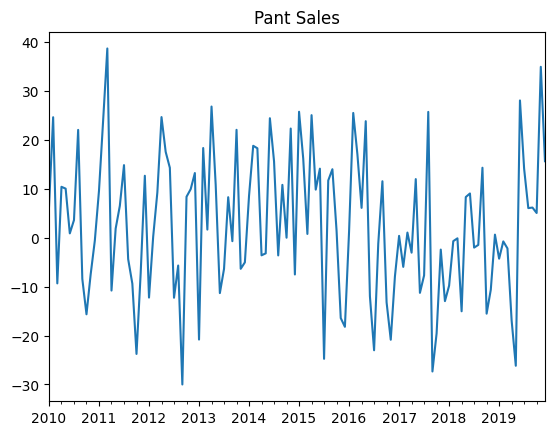

In [4]:

import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
df = pd.read_csv("time_series_dataset.csv", index_col=0)
df.index = pd.to_datetime(df.index)
y = df["Pant"]
y.name = "n_pant"

y.plot(title="Pant Sales");
# create the DF
seasonal_df = y.to_frame()




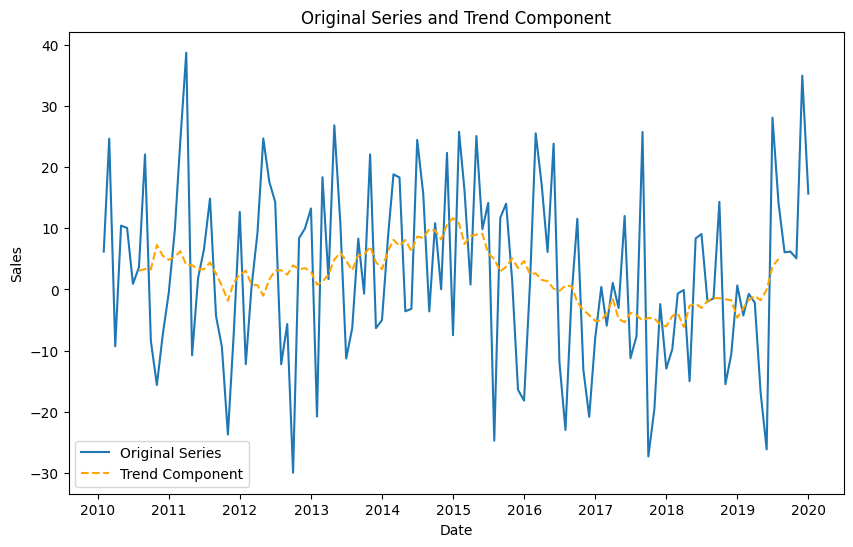

In [14]:
# calculate the trend component
seasonal_df["trend"] = seasonal_df["n_pant"].rolling(window=12, center=True).mean()

plt.figure(figsize=(10, 6))
plt.plot(seasonal_df.index, seasonal_df["n_pant"], label='Original Series')
plt.plot(seasonal_df.index, seasonal_df["trend"], label='Trend Component', linestyle='--', color='orange')
plt.title('Original Series and Trend Component')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

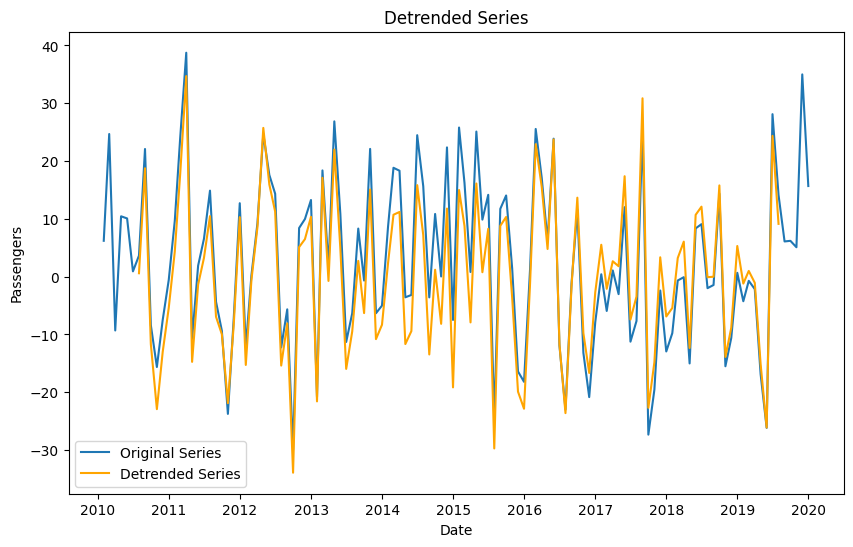

In [17]:
# detrend the series
seasonal_df["detrended"] = seasonal_df["n_pant"] - seasonal_df["trend"]

plt.figure(figsize=(10, 6))

plt.plot(seasonal_df.index, seasonal_df["n_pant"], label='Original Series')
plt.plot(seasonal_df.index, seasonal_df["detrended"], label='Detrended Series', color='orange')
plt.title('Detrended Series')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

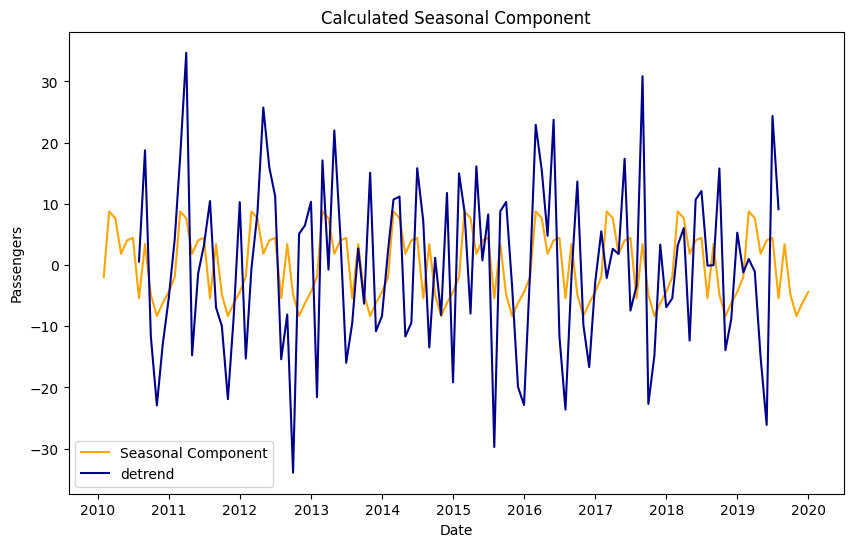

In [29]:
# calculate the seasonal component
seasonal_df.index = pd.to_datetime(seasonal_df.index)
seasonal_df["month"] = seasonal_df.index.month
seasonal_df["seasonality"] = seasonal_df.groupby("month")["detrended"].transform("mean")
plt.figure(figsize=(10, 6))
plt.plot(seasonal_df.index, seasonal_df["seasonality"], label='Seasonal Component', color='orange')
plt.plot(seasonal_df.index, seasonal_df["detrended"], label='detrend', color='darkblue')
plt.title('Calculated Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()



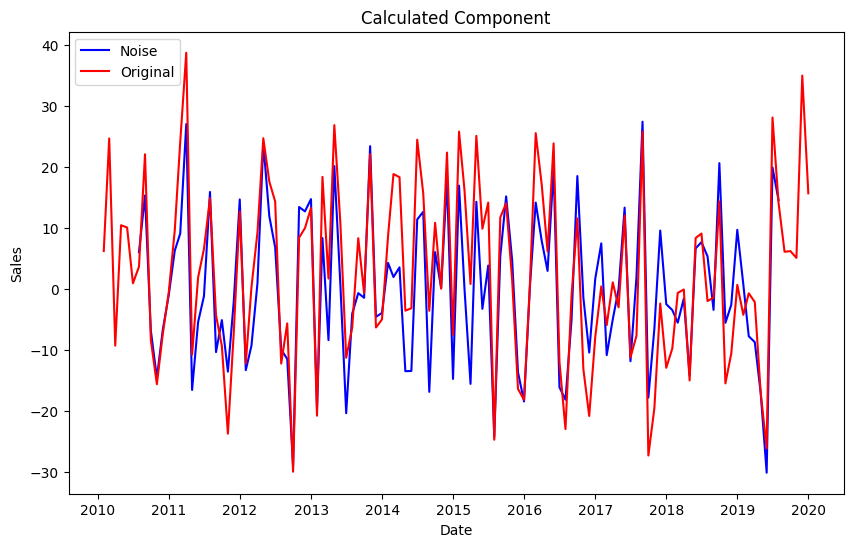

In [33]:
# get the residuals
seasonal_df["resid"] = seasonal_df["detrended"] - seasonal_df["seasonality"]

plt.figure(figsize=(10, 6))
plt.plot(seasonal_df.index, seasonal_df["resid"], label='Noise', color='blue')
plt.plot(seasonal_df.index, seasonal_df["n_pant"], label='Original', color='red')
plt.title('Calculated Component')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()